# How do we "rule out a model at $N\sigma$" by comparing to data?

Astronomer's often like say something like "Our data rule out this model at $5\sigma$." What does that mean? It's usually a short hand for something like "Given the data we have, the probability of the model being true is less than the probability of drawing a random number from a Gaussian distribution that is more than $5\sigma$ above the mean." But, how the heck do we calculate that? Let's look at it from a couple of directions. 

## What does "rule out at $N\sigma$" mean in terms of a $p$-value?
If we say "Our data rule out this model at $5\sigma$", we're making a statement about the how small the probability is that the model could still be true. Let's calculate the $p$-value to which this corresponds:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# we specify the number of sigma
nsigma = 5

# we use the "survival function" to determine the probability of getting a value higher than that
pvalue = norm.sf(nsigma)

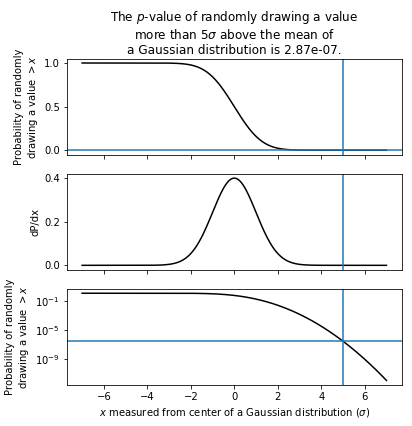

In [3]:
# let's plot all this
x = np.linspace(-7, 7, 1000)
probability = norm.sf(x)
dPdx = norm.pdf(x)

fi, ax = plt.subplots(3, 1, sharex=True, figsize=(6,6))

# plot the cumulative distribution
plt.sca(ax[0])
plt.plot(x, probability, color='black')
plt.axvline(nsigma); plt.axhline(pvalue)
plt.ylabel("Probability of randomly\ndrawing a value $>x$")
plt.title(f'''The $p$-value of randomly drawing a value 
more than {nsigma:.3g}$\sigma$ above the mean of 
a Gaussian distribution is {pvalue:.3}.''')

# plot the probability distribution
plt.sca(ax[1])
plt.plot(x, dPdx, color='black')
plt.axvline(nsigma)
plt.ylabel("dP/dx")

# plot the cumulative distribution, on a log scale
plt.sca(ax[2])
plt.semilogy(x, probability, color='black')
plt.axvline(nsigma); plt.axhline(pvalue)
plt.ylabel("Probability of randomly\ndrawing a value $>x$")
plt.xlabel("$x$ measured from center of a Gaussian distribution ($\sigma$)");


So, "ruling out the model at 5$\sigma$ means that we believe there to be only a $2.87\times 10^{-7}$ probability that the model could be true. Feel free to play around with the `nsigma` values in here to explore the significance of other limits!

## If we know the $p$-value of a model, at how many $\sigma$ can we rule it out?

From our model fitting, either by some analytic magic or by some MCMC, we might know the probability at which we can rule out a particular model. How do we convert that $p$-value into a statement about how we "rule it out at $N\sigma$"?

In [4]:
# we specify the p-value
pvalue = 0.001

# we use the "inverse survival function" to determine how many sigma above the mean
nsigma = norm.isf(pvalue)

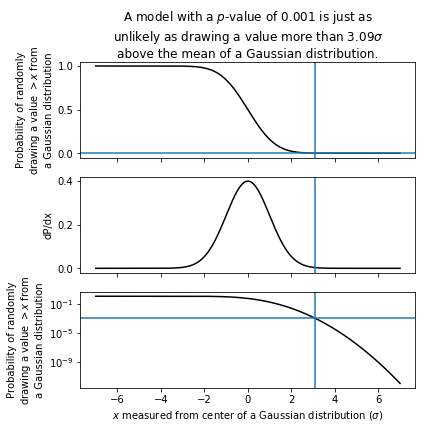

In [5]:
# let's plot all this
x = np.linspace(-7, 7, 1000)
probability = norm.sf(x)
dPdx = norm.pdf(x)


fi, ax = plt.subplots(3, 1, sharex=True, figsize=(6,6))

# plot the cumulative distribution
plt.sca(ax[0])
plt.plot(x, probability, color='black')
plt.axvline(nsigma); plt.axhline(pvalue)
plt.ylabel('''Probability of randomly
drawing a value $>x$ from 
a Gaussian distribution''')
plt.title(f'''A model with a $p$-value of {pvalue:.3g} is just as
unlikely as drawing a value more than {nsigma:.3g}$\sigma$ 
above the mean of a Gaussian distribution.''')

# plot the probability distribution
plt.sca(ax[1])
plt.plot(x, dPdx, color='black')
plt.axvline(nsigma)
plt.ylabel("dP/dx")

# plot the cumulative distribution, on a log scale
plt.sca(ax[2])
plt.semilogy(x, probability, color='black')
plt.axvline(nsigma); plt.axhline(pvalue)
plt.ylabel('''Probability of randomly
drawing a value $>x$ from 
a Gaussian distribution''')
plt.xlabel("$x$ measured from center of a Gaussian distribution ($\sigma$)");



## How do we go from the $\chi^2$ of a fit to the $p$-value at which we rule out the model?

Often, we'll compare models to data by calculating the figure-of-merit

$$\chi^2 = \sum^{N-1}_{i=0} \left( \frac{d_i - m_i}{\sigma_i} \right)^2$$

where $d_i$, $m_i$, and $\sigma_i$ are the data value, model estimate, and uncertainty at point $i$. If our uncertainties $\sigma_i$ are accurately estimated and approximately Gaussian, then there's an analytic estimate for the probability we would randomly find a particular value of $\chi^2$. This is called the $\chi^2$ distribution, and it can also be calculated using `scipy.stats`.

In [6]:
from scipy.stats import chi2

In [7]:
# we specify the chi^2 and the number of degrees of freedom
chi_squared = 50
degrees_of_freedom = 19

# we calculate the p-value using the survival function of the chi^2 distribution
pvalue = chi2.sf(chi_squared, degrees_of_freedom)

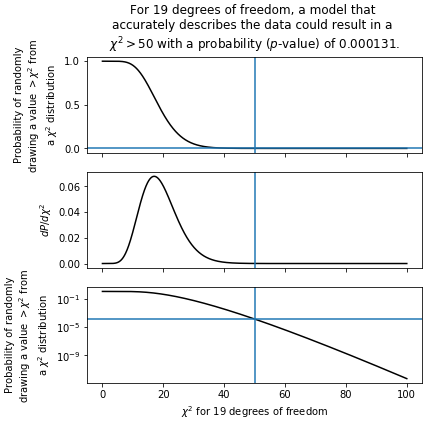

In [8]:
# let's plot all this
x = np.linspace(0, 100, 1000)
probability = chi2.sf(x, degrees_of_freedom)
dPdx = chi2.pdf(x, degrees_of_freedom)

fi, ax = plt.subplots(3, 1, sharex=True, figsize=(6,6))

# plot the cumulative distribution
plt.sca(ax[0])
plt.plot(x, probability, color='black')
plt.axvline(chi_squared); plt.axhline(pvalue)
plt.ylabel('''Probability of randomly
drawing a value $>\chi^2$ from 
a $\chi^2$ distribution''')
plt.title(f'''For {degrees_of_freedom} degrees of freedom, a model that 
accurately describes the data could result in a 
$\chi^2>${chi_squared:.3g} with a probability ($p$-value) of {pvalue:.3g}.''')

# plot the probability distribution
plt.sca(ax[1])
plt.plot(x, dPdx, color='black')
plt.axvline(chi_squared)
plt.ylabel("$dP/d\chi^2$")

# plot the cumulative distribution, on a log scale
plt.sca(ax[2])
plt.semilogy(x, probability, color='black')
plt.axvline(chi_squared); plt.axhline(pvalue)
plt.ylabel('''Probability of randomly
drawing a value $>\chi^2$ from 
a $\chi^2$ distribution''')
plt.xlabel(f"$\chi^2$ for {degrees_of_freedom} degrees of freedom");



## How do we go from the $\chi^2$ of a fit to "ruling out a model at $N\sigma$"?

Putting it all together, let's imagine we find that some model gives a particular $\chi^2$ for some number of degrees of freedom, calculate the $p$-value with which we can rule out that model, and then translate back to the number of $\sigma$ above the mean of a Gaussian distribution to which this corresponds.


In [9]:
# we specify the chi^2 and the number of degrees of freedom
chi_squared = 50
degrees_of_freedom = 19

# we calculate the p-value using the survival function of the chi^2 distribution
pvalue = chi2.sf(chi_squared, degrees_of_freedom)

# we use the "inverse survival function" to determine how many sigma above the mean
nsigma = norm.isf(pvalue)

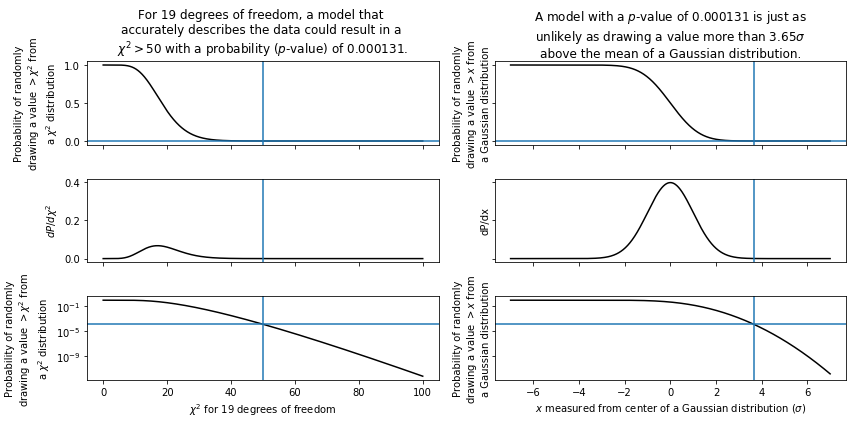

In [10]:
# let's plot all this
x = np.linspace(0, 100, 1000)
probability = chi2.sf(x, degrees_of_freedom)
dPdx = chi2.pdf(x, degrees_of_freedom)

fi, ax = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(12, 6))

# plot the cumulative distribution
plt.sca(ax[0, 0])
plt.plot(x, probability, color='black')
plt.axvline(chi_squared); plt.axhline(pvalue)
plt.ylabel('''Probability of randomly
drawing a value $>\chi^2$ from 
a $\chi^2$ distribution''')
plt.title(f'''For {degrees_of_freedom} degrees of freedom, a model that 
accurately describes the data could result in a 
$\chi^2>${chi_squared:.3g} with a probability ($p$-value) of {pvalue:.3g}.''')


# plot the probability distribution
plt.sca(ax[1, 0])
plt.plot(x, dPdx, color='black')
plt.axvline(chi_squared)
plt.ylabel("$dP/d\chi^2$")

# plot the cumulative distribution, on a log scale
plt.sca(ax[2, 0])
plt.semilogy(x, probability, color='black')
plt.axvline(chi_squared); plt.axhline(pvalue)
plt.ylabel('''Probability of randomly
drawing a value $>\chi^2$ from 
a $\chi^2$ distribution''')
plt.xlabel(f"$\chi^2$ for {degrees_of_freedom} degrees of freedom");



# let's plot all this
x = np.linspace(-7, 7, 1000)
probability = norm.sf(x)
dPdx = norm.pdf(x)

# plot the cumulative distribution
plt.sca(ax[0, 1])
plt.plot(x, probability, color='black')
plt.axvline(nsigma); plt.axhline(pvalue)
plt.ylabel('''Probability of randomly
drawing a value $>x$ from 
a Gaussian distribution''')
plt.title(f'''A model with a $p$-value of {pvalue:.3g} is just as
unlikely as drawing a value more than {nsigma:.3g}$\sigma$ 
above the mean of a Gaussian distribution.''')

# plot the probability distribution
plt.sca(ax[1, 1])
plt.plot(x, dPdx, color='black')
plt.axvline(nsigma)
plt.ylabel("dP/dx")

# plot the cumulative distribution, on a log scale
plt.sca(ax[2, 1])
plt.semilogy(x, probability, color='black')
plt.axvline(nsigma); plt.axhline(pvalue)
plt.ylabel('''Probability of randomly
drawing a value $>x$ from 
a Gaussian distribution''')
plt.xlabel("$x$ measured from center of a Gaussian distribution ($\sigma$)");

plt.tight_layout()